In [1]:
import os
import sys

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../abm/'))
sys.path.insert(0, os.path.abspath('../simulation/'))
sys.path.insert(0, os.path.abspath('../mesa/'))

from mesa.batchrunner import BatchRunner

from simulation.grid.model import GridSimulationEnvironment

from abm.utils.collectors.total_susceptible import total_susceptible
from abm.utils.collectors.total_infected import total_infected
from abm.utils.collectors.total_deaths import total_deaths
from abm.utils.collectors.total_recovered import total_recovered
from abm.utils.collectors.total_vaccinated import total_vaccinated

from abm.utils.collectors.count_age_infected import *
from abm.utils.collectors.count_age_exposed import *
from abm.utils.collectors.count_age_died import *
from abm.utils.collectors.count_age_recovered import *

from abm.utils.collectors.count_peak_values import *

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

warnings.simplefilter('ignore')

/home/joma/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (10,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
default_scenario_model_params = {
    "height": 60,
    "width": 60,
    "incubation_period": 7,
    "recovery_period": 14,
    "transmission_rate":  0.01,
    "viral_load_probability":  0.01,
    "wearing_masks": 0.8,
    "social_distance_limit": 0.7,
    "natural_immunity": 0.2,
    "exercise": 0.3,
    "preexisting_conditions": 0.6,
    "minority_restrictions": 18,
    "adult_restrictions": 65,
    "scenarios": "No Vaccination",
    "vaccination_implementation": "After 0 Days",
    "scale": 1000,
}

default_vaccination_model_params = {
    "height": 60,
    "width": 60,
    "incubation_period": 7,
    "recovery_period": 14,
    "transmission_rate":  0.01,
    "viral_load_probability":  0.01,
    "wearing_masks": 0.8,
    "social_distance_limit": 0.7,
    "natural_immunity": 0.2,
    "exercise": 0.3,
    "preexisting_conditions": 0.6,
    "minority_restrictions": 18,
    "adult_restrictions": 65,
    "scenarios": "With Vaccination",
    "vaccination_implementation": "After 0 Days",
    "scale": 1000,
}

mobility_vaccination_model_params = default_vaccination_model_params

mobility_vaccination_model_params["mobile_workforce"] = True

elderly_vaccination_model_params = default_vaccination_model_params

elderly_vaccination_model_params["elderly"] = True

all_configuration_vaccination_model_params = default_vaccination_model_params
all_configuration_vaccination_model_params["mobile_workforce"] = True
all_configuration_vaccination_model_params["elderly"] = True

In [3]:
default_vaccination_model = GridSimulationEnvironment(**default_vaccination_model_params)
while default_vaccination_model.running and default_vaccination_model.schedule.steps < 270:
    default_vaccination_model.step()

Updating SCALE field...
New Data: 1000


Updating VACCINE_PRIORITIZATION field...
New Data: {'frontliners_ratio': {'activated': 1, 'value': 0.001206896551724138}, 'public_admin': {'activated': 1, 'value': 0.06}, 'persons_with_difficulty': {'activated': 1, 'value': 0.03730271023}, 'gainful_workers': {'activated': 1, 'value': 0.47507927437}, 'mobile_workforce': {'activated': 1, 'value': 0.484}, 'elderly': {'activated': 1, 'value': 0.06693868492}}


Updating MORTALITY_RATE field...
New Data: {'age_00-09': {'min': 0, 'max': 9, 'rate': 0.004672897196261682}, 'age_10-19': {'min': 10, 'max': 19, 'rate': 0.0}, 'age_20-29': {'min': 20, 'max': 29, 'rate': 0.0006009615384615385}, 'age_30-39': {'min': 30, 'max': 39, 'rate': 0.004036326942482341}, 'age_40-49': {'min': 40, 'max': 49, 'rate': 0.009688934217236104}, 'age_50-59': {'min': 50, 'max': 59, 'rate': 0.017263427109974423}, 'age_60-69': {'min': 60, 'max': 69, 'rate': 0.03470919324577861}, 'age_70-79': {'min': 70, 'max': 79, 'rate': 0.081206496

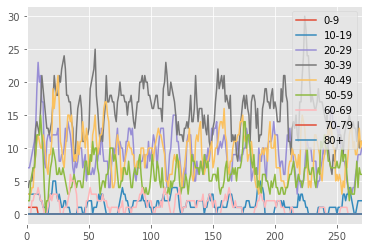

In [4]:
agents_infected_collector = default_vaccination_model.agents_infected_collector.get_model_vars_dataframe()
agents_infected_collector.to_csv("default_vaccination_model.agents_infected_collector.csv")
agents_infected_collector.plot.line()

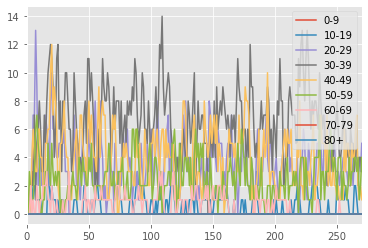

In [5]:
agents_exposed_collector = default_vaccination_model.agents_exposed_collector.get_model_vars_dataframe()
agents_exposed_collector.to_csv("default_vaccination_model.agents_exposed_collector.csv")
agents_exposed_collector.plot.line()

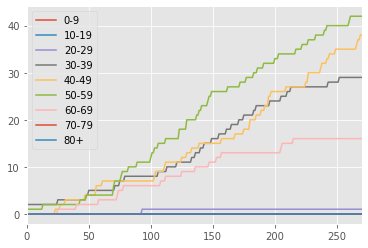

In [6]:
agents_died_collector = default_vaccination_model.agents_died_collector.get_model_vars_dataframe()
agents_died_collector.to_csv("default_vaccination_model.agents_died_collector.csv")
agents_died_collector.plot.line()

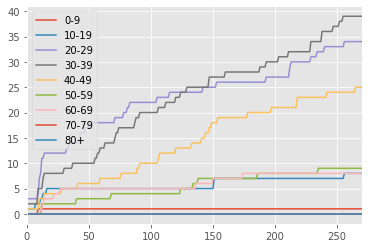

In [7]:
agents_recovered_collector = default_vaccination_model.agents_recovered_collector.get_model_vars_dataframe()
agents_recovered_collector.to_csv("default_vaccination_model.agents_recovered_collector.csv")
agents_recovered_collector.plot.line()

In [8]:
model_peak_collector = default_vaccination_model.model_peak_collector.get_model_vars_dataframe()
model_peak_collector.to_csv("default_vaccination_model.model_peak_collector.csv")
model_peak_collector.head()

,Peak Infected,Peak Date
0,23,23
1,24,24
2,29,29
3,34,34
4,40,40


In [9]:
model_agents = default_vaccination_model.datacollector.get_model_vars_dataframe()
model_agents.to_csv("default_vaccination_model.model_agents.csv")
model_agents.head()

,Susceptible,Infected,Deaths,Recovered,Vaccinated
0,2542,23,3,7,541
1,2542,23,3,7,541
2,2537,24,3,7,541
3,2527,29,3,7,541
4,2517,34,3,7,541
